# IEEE Fraud Detection

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [1]:
# TODO: code and runtime results
import os
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import datetime

In [2]:
train_trans = pd.read_csv("data\\train_transaction.csv")
train_identity = pd.read_csv("data\\train_identity.csv")

Fraud Transactions

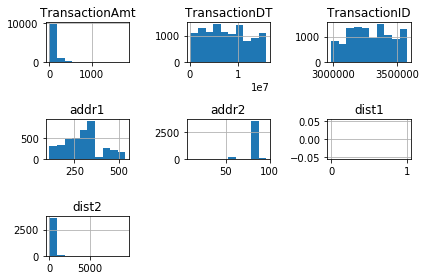

In [267]:
trans_cols = ['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'addr1', 'addr2', 'dist1', 'dist2']
identity_cols = ['TransactionID', 'DeviceType', 'DeviceInfo']
train_identity = train_identity[identity_cols]
fraudTrans = train_trans.loc[train_trans['isFraud']==1][trans_cols]
identity_fraud = train_identity[train_identity["TransactionID"].isin(fraudTrans["TransactionID"])]
train_fraud = pd.merge(fraudTrans, identity_fraud, on='TransactionID')

train_fraud.hist()
plt.tight_layout()

Non Fraud Transaction

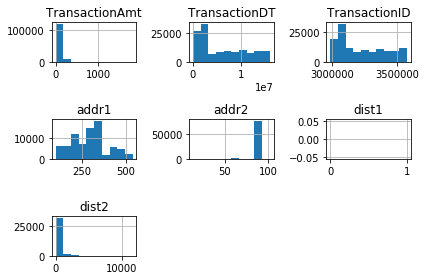

In [4]:
nonFraudTrans = train_trans.loc[train_trans['isFraud'] == 0][trans_cols]
identity_nonFraud = train_identity[train_identity["TransactionID"].isin(nonFraudTrans["TransactionID"])]
train_nonFraud = pd.merge(nonFraudTrans, identity_nonFraud, on='TransactionID')

train_nonFraud.hist()
plt.tight_layout()

<b><h3>TransactionID</h3></b><br>
All the transaction ids does not have a corresponding Identity.

In [5]:
print("Fraud Transactions: %d" % len(train_trans[train_trans["isFraud"] == 1]["TransactionID"]))
print("Fruad Transactions with Identity: %d" % len(train_fraud))

Fraud Transactions: 20663
Fruad Transactions with Identity: 11318


<b><h3>DeviceType</h3></b><br>
Visualizing the fraud vs Non-Fraud transactions on desktop and mobile devices.<br>
<b>Insight:</b> <i>The number of fraud transactions compared to non fraud are more for mobile devices than for the desktop devices.</i>

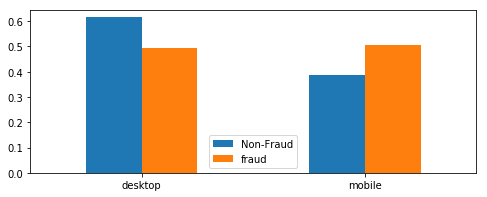

In [6]:
non_fraud_dataframe = train_nonFraud['DeviceType'].dropna()
fraud_dataframe = train_fraud['DeviceType'].dropna()
df = pd.DataFrame({'Non-Fraud': non_fraud_dataframe.value_counts(normalize=True), 'fraud': fraud_dataframe.value_counts(normalize=True)})
# plt.hist([, ], color=['blue','green'])
df.plot.bar(figsize=(8,3), rot=0)

<b><h3>DeviceInfo</h3></b><br>
Most used  mobile and desktop devices for Fraud transactions

<b>Insight:</b> <i>Difference in the number of fraud transactions versus non fraud transactions made using Windows is much higher than MacOS based devices.</i><br>

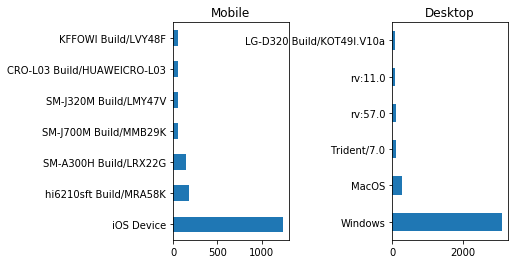

In [7]:
fig = plt.figure()
fig.subplots_adjust(wspace=.9)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('Mobile')
ax2.title.set_text('Desktop')

mobile_train_fraud = train_fraud[train_fraud['DeviceType']=='mobile']['DeviceInfo'].value_counts()
most_used_mobile_device  = mobile_train_fraud> 50
mobile_train_fraud = mobile_train_fraud[most_used_mobile_device]

mobile_train_fraud.plot.barh(ax = ax1)

desktop_train_fraud = train_fraud[train_fraud['DeviceType']=='desktop']['DeviceInfo'].value_counts()
most_used_desktop_device  = desktop_train_fraud> 50
desktop_train_fraud = desktop_train_fraud[most_used_desktop_device]

desktop_train_fraud.plot.barh(ax = ax2)

Most used mobile and desktop devices which does not involve any fraud

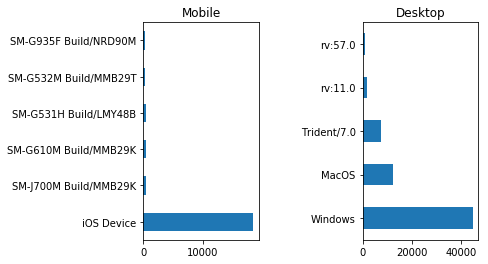

In [8]:
fig = plt.figure()
fig.subplots_adjust(wspace=.9)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('Mobile')
ax2.title.set_text('Desktop')

mobile_train_nonFraud = train_nonFraud[train_nonFraud['DeviceType']=='mobile']['DeviceInfo'].value_counts()
most_used_mobile_device  = mobile_train_nonFraud> 300
mobile_train_nonFraud = mobile_train_nonFraud[most_used_mobile_device]
mobile_train_nonFraud.plot.barh(ax = ax1)

desktop_train_nonFraud = train_nonFraud[train_nonFraud['DeviceType']=='desktop']['DeviceInfo'].value_counts()
most_used_desktop_device  = desktop_train_nonFraud> 300
desktop_train_nonFraud = desktop_train_nonFraud[most_used_desktop_device]

desktop_train_nonFraud.plot.barh(ax = ax2)

Side by side comparison of top 10 Fraud and Non-Fraud transaction on both mobile and desktop devices.

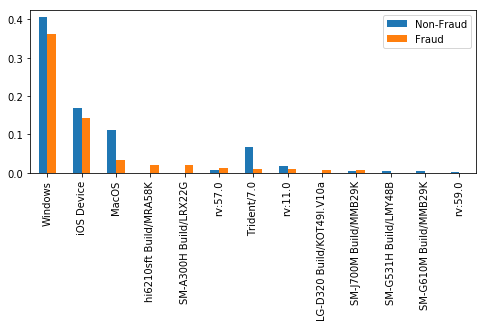

In [9]:
df = pd.DataFrame({'Non-Fraud': train_nonFraud['DeviceInfo'].value_counts(normalize=True).iloc[:10], 'Fraud': train_fraud['DeviceInfo'].value_counts(normalize=True).iloc[:10]})
df.sort_values('Fraud', ascending=False).plot.bar(figsize=(8,3))

<h3><b>TransactionDT</b></h3><br>

<b>Insight:</b> <i>For the First month, there are less fruad transactions compared to the non fruad transactions. For the rest of the year the fraud transactions are almost always greater than the non fruad transactions.</i>

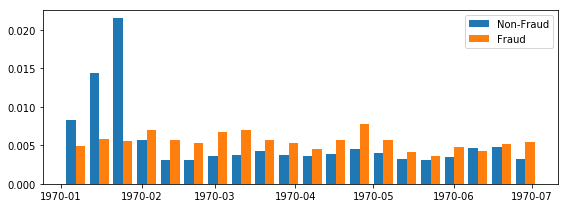

In [11]:
time_fraud = pd.to_datetime(train_fraud['TransactionDT'], unit = 's')
time_nonFraud = pd.to_datetime(train_nonFraud['TransactionDT'], unit = 's')
plt.figure(figsize=(8,3))
plt.hist([time_nonFraud, time_fraud], bins = 20, density=True)
plt.legend(['Non-Fraud', 'Fraud'])
plt.tight_layout()

<b><h3>TransactionAmt</h3></b><br>

<b>Visualization:</b> Distribution of fraud and non-fraud transactions for the Top 10 fraud transaction and top 10 non fraud transaction amounts<br><br>
    <b>Insight:</b>
    <ul>
    <li><i>Most number of fraud transactions were of  $\$150$</i></li>
    <li><i>Amounts such as $\$150$ and $\$200$ have comparable number of fraud and non fraud transactions.</i> </li>
    <li><i>For $\$100$ transactions, there are quite less fraud transactions as compared to Non-Fruad transactions.</i></li>
    <li><i>Top $10$ fraud transaction amounts are not the the same as top $10$ non-fraud transaction amounts.</i></li>   
    </ul>    

<Figure size 576x216 with 0 Axes>

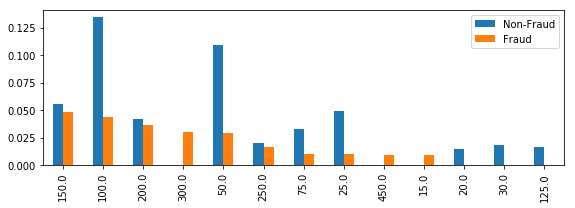

In [12]:
plt.figure(figsize=(8,3))
df = pd.DataFrame({'Non-Fraud': train_nonFraud['TransactionAmt'].value_counts(normalize=True).iloc[:10], 'Fraud': train_fraud['TransactionAmt'].value_counts(normalize=True).iloc[:10]})
df.sort_values('Fraud', ascending=False).plot.bar(figsize=(8,3))
plt.tight_layout()

<b>Visualizing the top 10 fraud transaction amounts and the non fraud transactions for the same amount.</b>

<Figure size 576x216 with 0 Axes>

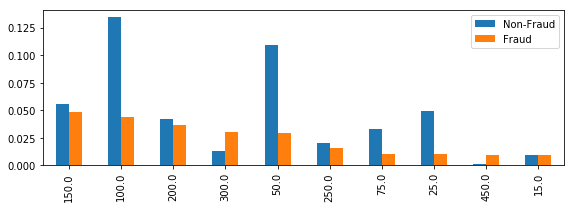

In [13]:
plt.figure(figsize=(8,3))
fraud_amt = train_fraud['TransactionAmt'].value_counts(normalize=True).iloc[:10]
list = fraud_amt.keys()
nonFraud_amt = train_nonFraud['TransactionAmt'].value_counts(normalize=True).loc[list]

df = pd.DataFrame({'Non-Fraud': nonFraud_amt , 'Fraud': fraud_amt})
df.sort_values('Fraud', ascending=False).plot.bar(figsize=(8,3))
plt.tight_layout()

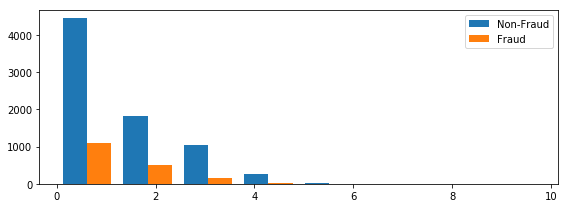

In [14]:
plt.figure(figsize=(8,3))
plt.hist([np.log(train_nonFraud['TransactionAmt'].value_counts()), np.log(train_fraud['TransactionAmt'].value_counts())], bins=8)
plt.legend(['Non-Fraud', 'Fraud'])
plt.tight_layout()

<h3>ProductCD</h3>

Considering only those transactions which have identity. <br>
<b>Insights:</b> <ul>
    <li>W does not have an identity.</li>
    <li>C is involved in most fraud transactions.</li>
    <li>Non-Fraud transactions of W are almost double of fraud.</li>
    <li>For the rest i.e. H, R and S, the fraud and non-fraud transactions are comparable.</li>
    </ul>

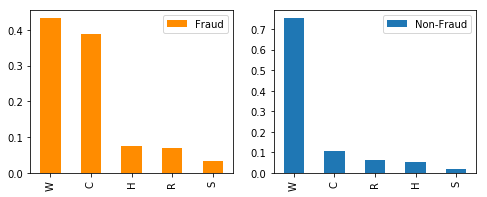

In [15]:
plt.subplot(121)
fraud_products = fraudTrans['ProductCD'].value_counts(normalize=True)
fraud_products.sort_values(ascending=False).plot.bar(figsize=(8,3), color=['darkorange'])
plt.legend(['Fraud'])

plt.subplot(122)
nonFraud_products = nonFraudTrans['ProductCD'].value_counts(normalize=True)
nonFraud_products.sort_values(ascending=False).plot.bar(figsize=(8,3))
plt.legend(['Non-Fraud'])

<h3>Card 4</h3><br>
<b>Insights:</b>
    <ul>
    <li>Visa has the most number of fraud transactions followed by Mastercard.</li>
    <li>Discover card has been used more for fraud transaction as compared to American Express.</li>
    </ul>

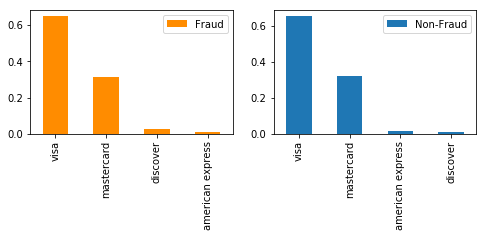

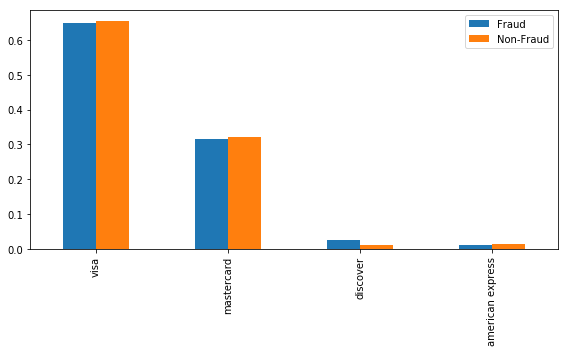

In [16]:
fraud_card4 = fraudTrans['card4'].value_counts(normalize=True)
plt.subplot(221)
fraud_card4.sort_values(ascending=False).plot.bar(figsize=(8,5), color=['darkorange'])
plt.legend(['Fraud'])

nonFraud_card4 = nonFraudTrans['card4'].value_counts(normalize=True)
plt.subplot(222)
nonFraud_card4.sort_values(ascending=False).plot.bar(figsize=(8,5))
plt.legend(['Non-Fraud'])

df = pd.DataFrame({'Fraud': fraud_card4, 'Non-Fraud': nonFraud_card4})
df.sort_values('Fraud', ascending=False).plot.bar(figsize=(8,5))
plt.legend(['Fraud', 'Non-Fraud'])
plt.tight_layout()

<h3>Card 6</h3><br>
<b>Insights:</b>
    <ul>
    <li>Fraud transactions of credit cards are almost double of non fraud credit card transactions.</li>
    <li>Credit cards are more used for fraud transactions than the debit cards. This may be because people use more credit cards than debit cards, hence more fraud with credit cards.</li>
    </ul>

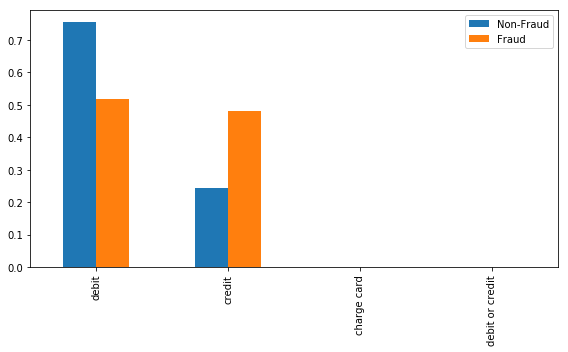

In [17]:
fraud_card6 = fraudTrans['card6'].value_counts(normalize=True)
nonFraud_card6 = nonFraudTrans['card6'].value_counts(normalize=True)

df = pd.DataFrame({'Non-Fraud': nonFraud_card6, 'Fraud': fraud_card6})
df.sort_values('Fraud', ascending=False).plot.bar(figsize=(8,5))
plt.legend(['Non-Fraud', 'Fraud'])
plt.tight_layout()

<h3>P_emaildomain</h3><br>
<b>Insights:</b>
    <ul>
    <li>Of the top 10, gmail.com, hotmail.com and outlook.com are the top three domains for which Fraud transactions are more than Non-Fraud transactions.</li>
    <li>yahoo.com has much less fraud transactions as compared to non fraud transactions.</li>
    <li>att.net has no fraud transaction whereas mail.com is only being used for fraud transactions.</li>
    </ul>

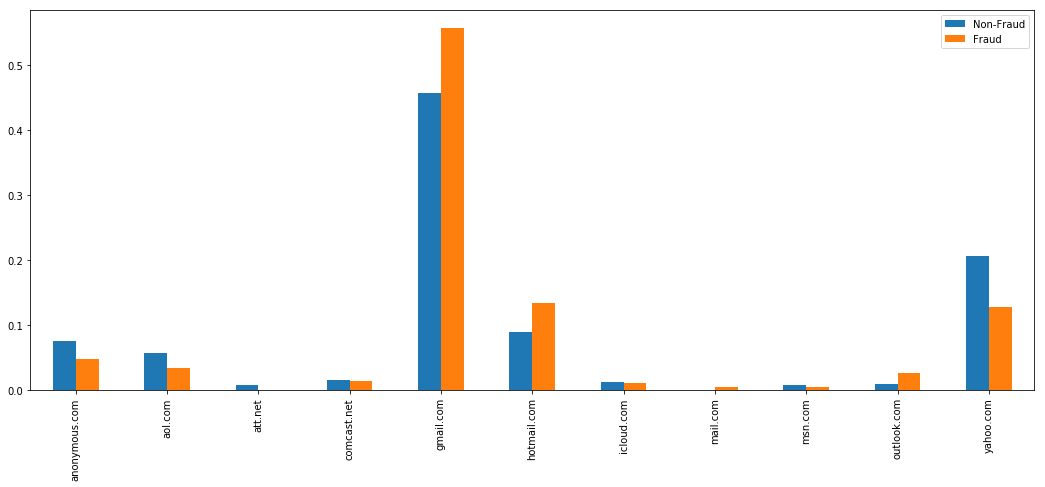

In [18]:
fraud_P_emaildomain = fraudTrans['P_emaildomain'].value_counts(normalize=True).iloc[:10]
nonFraud_P_emaildomain = nonFraudTrans['P_emaildomain'].value_counts(normalize=True).iloc[:10]
df = pd.DataFrame({'Non-Fraud': nonFraud_P_emaildomain, 'Fraud': fraud_P_emaildomain})
df.plot.bar(figsize=(18,7))

<h3>R_emaildomain</h3><br>
<b>Insights:</b>
    <ul>
    <li>Among the top 10 domains in which fraud is maximum; gmail.com, outlook.com and icloud.com has more number of fraud transactions than non fraud transactions.</li>
    <li>In Purchaser email, fraud transactions for hotmail.com were more than the non fraud ones but for Recipient email there are less fraud transactions than non fraud.</li>
    </ul>

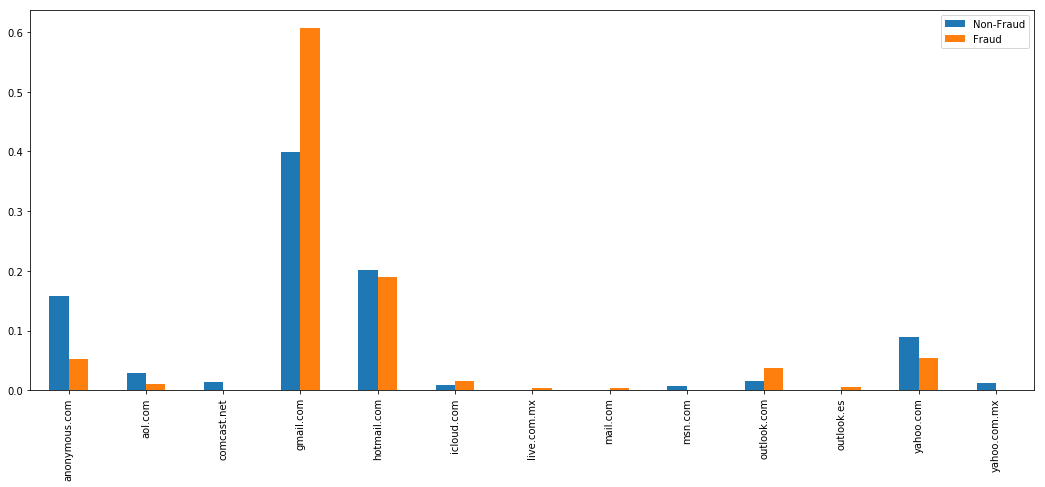

In [19]:
fraud_R_emaildomain = fraudTrans['R_emaildomain'].value_counts(normalize=True).iloc[:10]
nonFraud_R_emaildomain = nonFraudTrans['R_emaildomain'].value_counts(normalize=True).iloc[:10]
df = pd.DataFrame({'Non-Fraud': nonFraud_R_emaildomain, 'Fraud': fraud_R_emaildomain})
df.plot.bar(figsize=(18,7))

<h3>addr1</h3><br>
<b>Visualization:</b> The plot below shows the top 10 regions with most fraud transactions and their non-fraud transactions.<br>
<b>Insight:</b> The top 10 fraud transactions have comparable amount of non fraud transactions.

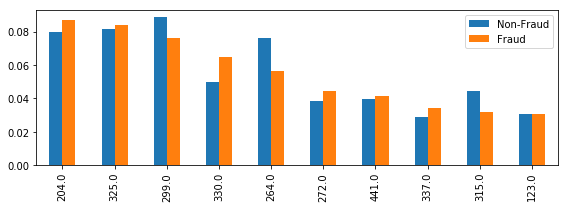

In [20]:
fraud_addr1 = fraudTrans['addr1'].value_counts(normalize=True).iloc[:10]
list = fraud_addr1.keys()
nonFraud_addr1 = nonFraudTrans['addr1'].value_counts(normalize=True).loc[list]
df = pd.DataFrame({'Non-Fraud': nonFraud_addr1, 'Fraud': fraud_addr1})
df.sort_values('Fraud', ascending=False).plot.bar(figsize=(8,3))
plt.tight_layout()

<h3>addr2</h3><br>
<b>Visualization:</b> The plot below shows the countries with most fraud transactions.<br>
<b>Insight:</b> Most of the fraud and non fraud transactions in the dataset belong to a particular country whose country code is 87.

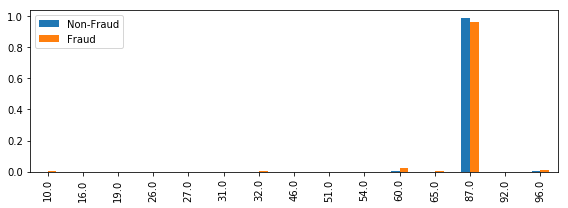

In [21]:
fraud_addr2 = fraudTrans['addr2'].value_counts(normalize=True).iloc[:10]
nonFraud_addr2 = nonFraudTrans['addr2'].value_counts(normalize=True).iloc[:10]
df = pd.DataFrame({'Non-Fraud': nonFraud_addr2, 'Fraud': fraud_addr2})
df.plot.bar(figsize=(8,3))
plt.tight_layout()

<h3>dist1</h3>

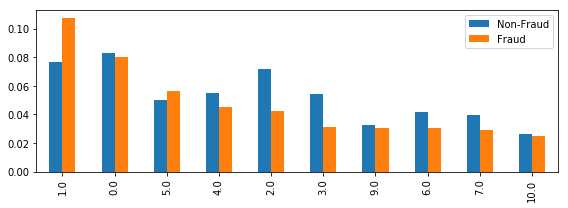

In [22]:
fraud_dist1 = fraudTrans['dist1'].value_counts(normalize=True).iloc[:10]
list_fraud_dist1 = fraud_dist1.keys()
nonFraud_dist1 = nonFraudTrans['dist1'].value_counts(normalize=True).iloc[list_fraud_dist1]
df = pd.DataFrame({'Non-Fraud': nonFraud_dist1, 'Fraud': fraud_dist1})
df.sort_values('Fraud', ascending=False).plot.bar(figsize=(8,3))
plt.tight_layout()

<h3>dist2</h3><br>

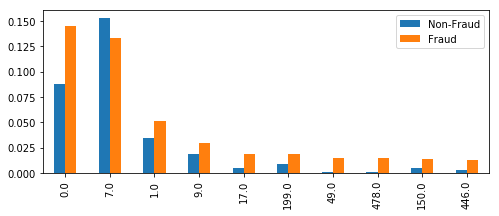

In [23]:
fraud_dist2 = fraudTrans['dist2'].value_counts(normalize=True).iloc[:10]
list_fraud_dist2 = fraud_dist2.keys()
nonFraud_dist2 = nonFraudTrans['dist2'].value_counts(normalize=True).loc[list_fraud_dist2]
df = pd.DataFrame({'Non-Fraud': nonFraud_dist2, 'Fraud': fraud_dist2})
df.sort_values('Fraud', ascending=False).plot.bar(figsize=(8,3))

## Part 2 - Transaction Frequency

87.0


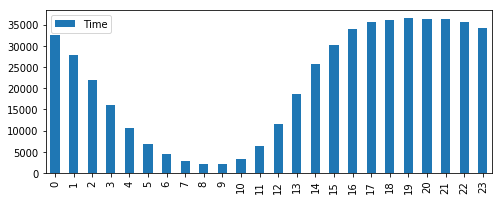

In [24]:
# TODO: code to generate the frequency graph
most_frequent_country = train_trans[train_trans['isFraud'] == 1]['addr2'].value_counts().iloc[:1]
print(most_frequent_country.keys()[0])

time = pd.to_datetime(nonFraudTrans[nonFraudTrans['addr2'] == most_frequent_country.keys()[0]]['TransactionDT'], unit = 's')
time_of_day = time.dt.hour
sorted_time_values = time_of_day.value_counts().sort_index()

df = pd.DataFrame({'Time': sorted_time_values})

df.plot.bar(figsize=(8,3))

<ul>
    <li>The most frequent country code came out to be 87. For this country, the most transaction happened between 1300 hours and 0300 hours i.e. 12 A.M. to 4 A.M and 1 P.M. to 11 P.M.</li>
    <li>The gradual decrease in the number of transactions and then an increase shows us that when most people are asleep there are less transactions and as the people wake up and are the working hours start, the number of transactions start increasing.</li>
    <li>We can also say that people are working between 1600 hours and 2100 hours as the number of transactions between these times is maximum.</li>
    <li>By looking at this we can say that people in this country are awake from 1P.M. to 12 A.M then people start sleeping so the number of transactions start reducing.</li>
</ul>

## Part 3 - Product Code

In [256]:
# TODO: code to analyze prices for different product codes
from scipy import stats
fraud_productCD_amount = fraudTrans.groupby('ProductCD').mean().sort_values('TransactionAmt', ascending=False)
# fraud_productCD_amount = fraudTrans.groupby(['ProductCD'])['TransactionAmt'].transform('max')
# print(fraud_productCD_amount.describe())

print("Average amount for Fraud transactions")
print(fraud_productCD_amount['TransactionAmt'])
print("------------------------")
print("Average amount for Non Fraud transactions")
non_fraud_productCD_amount = nonFraudTrans.groupby('ProductCD').mean().sort_values('TransactionAmt', ascending=False)
print(non_fraud_productCD_amount['TransactionAmt'])

print("------------------------")
print("Minimum amount of purchase for the products")
productCD_R_min_amount = train_trans[train_trans['ProductCD']== "R"]['TransactionAmt'].min()
productCD_W_min_amount = train_trans[train_trans['ProductCD']== "W"]['TransactionAmt'].min()
productCD_H_min_amount = train_trans[train_trans['ProductCD']== "H"]['TransactionAmt'].min()
productCD_S_min_amount = train_trans[train_trans['ProductCD']== "S"]['TransactionAmt'].min()
productCD_C_min_amount = train_trans[train_trans['ProductCD']== "C"]['TransactionAmt'].min()

print("R %f"%productCD_R_min_amount)
print("W %f"%productCD_W_min_amount)
print("H %f"%productCD_H_min_amount)
print("S %f"%productCD_S_min_amount)
print("C %f"%productCD_C_min_amount)

Average amount for Fraud transactions
ProductCD
R    244.074334
W    229.047325
H    156.691233
S     63.288630
C     48.878796
Name: TransactionAmt, dtype: float64
------------------------
Average amount for Non Fraud transactions
ProductCD
R    165.327516
W    151.578232
H     68.990016
S     60.080205
C     42.077463
Name: TransactionAmt, dtype: float64
------------------------
Minimum amount of purchase for the products
R 25.000000
W 1.000000
H 15.000000
S 5.000000
C 0.251000


<b>Insights:</b> By looking at the average amount of transaction for both the fraud and non fraud transactions we can say that <b>R is the most expensive product/service and C is the least expensive.</b> We can say this because the transaction amount for both the fraud and non fraud transactions of R is maximum and for C it's minimum.<br>
We can confirm the same by looking at the minimum amount of transaction for the products/services.

## Part 4 - Correlation Coefficient

          Amount      Time
Amount  1.000000  0.642117
Time    0.642117  1.000000


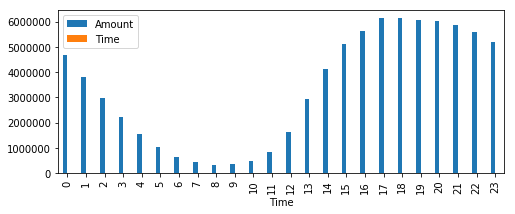

In [184]:
# TODO: code to calculate correlation coefficient
time = pd.to_datetime(train_trans['TransactionDT'], unit = 's')
time_of_day = time.dt.hour
trans_amt = train_trans['TransactionAmt']
df_time_amount = pd.DataFrame({'Time': time_of_day, 'Amount': trans_amt})
df = df_time_amount.groupby(['Time']).sum()

df['Time'] = df.index

df.plot.bar(figsize=(8,3))

print(df.corr(method='pearson'))

The pearson correlation coefficient is 0.642117 for Time of day and the Amount of fraud transaction.

## Part 5 - Interesting Plot

There are some mobile devices which requests desktop sites while performing transactions that is why they appear both as a mobile and desktop device. Some examples for these devices are:<br>
SM-A300H Build/LRX22G - Samsung Galaxy A3<br>
Moto E (4) Plus Build/NMA26.42-69 - Moto E4 Plus<br>
Moto G (5) Plus Build/NPN25.137-92 - Moto G5 Plus<br>

C:\Users\pulki\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


Ratio of Non-Fraud to Fraud transactions on various mobiles
                                      Ratio
LG-D320 Build/KOT49I.V10a          0.000641
SM-A300H Build/LRX22G              0.000641
Moto E (4) Plus Build/NMA26.42-69  0.023390
Moto G (4) Build/NPJ25.93-14.7     0.032041
rv:58.0                            0.064082

Some of the devices requesting both desktop and mobile sites
SM-A300H Build/LRX22G    2980
rv:57.0                   846
rv:58.0                   444
rv:59.0                   435
SM-J500M Build/LMY48B     224
Name: DeviceInfo, dtype: int64

Ratio of fraud transactions on various mobile devices requesting desktop sites.
                 Ratio
Trident/7.0  66.240604
MacOS        32.985235
rv:57.0      21.380537
iOS Device    6.221812
rv:59.0       5.127852


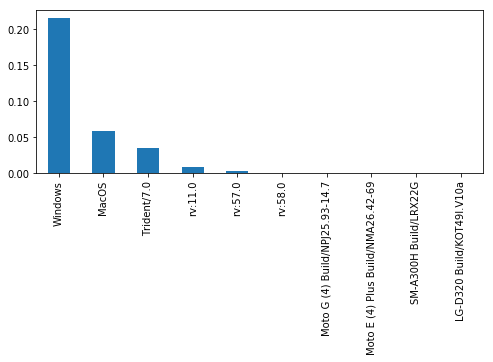

In [366]:
mobile_train_fraud = train_fraud[train_fraud['DeviceType']=='desktop']['DeviceInfo'].value_counts()

mobile_train_fraud = mobile_train_fraud[mobile_train_fraud > 15]
list = mobile_train_fraud.keys()
mobile_train_nonFraud = train_nonFraud[train_nonFraud['DeviceType'] == 'desktop']['DeviceInfo'].value_counts().loc[list]
mobile_nonFraud_fraud_ratio = mobile_train_nonFraud.div(mobile_train_fraud.iloc[0])
final_df = pd.DataFrame({'Ratio': mobile_nonFraud_fraud_ratio})
print("Ratio of Non-Fraud to Fraud transactions on various mobiles")
print(final_df.sort_values(by='Ratio').head())


mobile_train_fraud = train_fraud[train_fraud['DeviceType']=='mobile']['DeviceInfo']
desktop_train_fraud = train_fraud[train_fraud['DeviceType']=='desktop']['DeviceInfo']
fraud_mobile_as_desktop = pd.merge(mobile_train_fraud, desktop_train_fraud, on='DeviceInfo')
fraud_mobile_as_desktop = fraud_mobile_as_desktop['DeviceInfo'].value_counts()
print("\nSome of the devices requesting both desktop and mobile sites")
print(fraud_mobile_as_desktop.head())

mobile_train_nonFraud = train_nonFraud[train_nonFraud['DeviceType']=='mobile']['DeviceInfo']
desktop_train_nonFraud = train_nonFraud[train_nonFraud['DeviceType']=='desktop']['DeviceInfo']
nonFraud_mobile_as_desktop = pd.merge(mobile_train_nonFraud, desktop_train_nonFraud, on='DeviceInfo')
nonFraud_mobile_as_desktop = nonFraud_mobile_as_desktop['DeviceInfo'].value_counts()


nonFraud_fraud_ratio_mobile_as_desktop = nonFraud_mobile_as_desktop.div(fraud_mobile_as_desktop.iloc[0])
final_df = pd.DataFrame({'Ratio': nonFraud_fraud_ratio_mobile_as_desktop})
print("\nRatio of fraud transactions on various mobile devices requesting desktop sites.")
print(final_df.head())

df = mobile_nonFraud_fraud_ratio.div(nonFraud_fraud_ratio_mobile_as_desktop.iloc[0])

df.sort_values(ascending=False).iloc[:10].plot.bar(figsize=(8,3))

<h4>Interesting Insight:</h4><br>
As we can see from the above plot, even for the devices with the highest ratio of the above two ratios, these ratios are much smaller than 1. Thus, we can conclude that when a mobile device does a transaction by requesting a desktop site, that transaction is much more likely to be a non fraudulent transaction compared to a transaction by the same mobile using the mobile site.

## Part 6 - Prediction Model

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [29]:
#Load test data
train_trans = pd.read_csv("data\\train_transaction.csv")
train_identity = pd.read_csv("data\\train_identity.csv")
test_trans = pd.read_csv("data\\test_transaction.csv")
test_identity = pd.read_csv("data\\test_identity.csv")
train_identity = pd.read_csv("data\\train_identity.csv")
sample_submission = pd.read_csv("data\\sample_submission.csv")

In [233]:
id_cols = train_identity.columns.values
train_cols = train_trans.drop('isFraud', axis=1).columns.values

X_train = pd.merge(train_trans[train_cols], train_identity[id_cols], how='left')
X_test = pd.merge(test_trans[train_cols], test_identity[id_cols], how='left')

X_train_id = X_train.pop('TransactionID')
X_test_id = X_test.pop('TransactionID')

In [234]:
# filtering time so that it can be used as one of the feature
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")

time_data['Date'] = test_trans['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
time_data['weekday'] = time_data['Date'].dt.dayofweek
time_data['hour'] = time_data['Date'].dt.hour
time_data['day'] = time_data['Date'].dt.day

time_data['weekday'] = time_data['weekday'].astype(str)
time_data['hour'] = time_data['hour'].astype(str)
time_data['weekday_hour'] = time_data['weekday'] + time_data['hour']

X_test['TransactionDT'] = time_data['weekday_hour']


time_data['Date'] = train_trans['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
time_data['weekday'] = time_data['Date'].dt.dayofweek
time_data['hour'] = time_data['Date'].dt.hour
time_data['day'] = time_data['Date'].dt.day

time_data['weekday'] = time_data['weekday'].astype(str)
time_data['hour'] = time_data['hour'].astype(str)
time_data['weekday_hour'] = time_data['weekday'] + time_data['hour']

X_train['TransactionDT'] = time_data['weekday_hour']

In [246]:
train_cols = train_trans.drop('isFraud', axis=1).columns.values
identity_cols = train_identity.columns.values

trans_cols = ['TransactionID', 'isFraud', 'P_emaildomain', 'R_emaildomain', 'ProductCD', 'TransactionDT', 'TransactionAmt', 'addr1', 'addr2', 'dist2', 'card1', 'card2', 'card3', 'C5', 'C7', 'D3', 'D5']
identity_cols = ['TransactionID', 'DeviceType', 'DeviceInfo', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07']
X_train = pd.merge(train_trans[trans_cols], train_identity[identity_cols], on='TransactionID', how='left')

test_cols = ['TransactionID', 'TransactionAmt', 'TransactionDT', 'P_emaildomain', 'R_emaildomain', 'ProductCD', 'addr1', 'addr2', 'dist2', 'card1', 'card2', 'card3', 'C5', 'C7', 'D3', 'D5']
X_test = pd.merge(test_trans[test_cols], test_identity[identity_cols], on='TransactionID' , how='left')

X_train_id = X_train.pop('TransactionID')
X_test_id = X_test.pop('TransactionID')

In [247]:
#Encoding categorical data into numerical and replacing null values with "mode" of that column

enc = LabelEncoder()

def encodeData(df):
    df['P_emaildomain'].fillna(df['P_emaildomain'].mode()[0], inplace=True)
    enc.fit(df['P_emaildomain'])
    df['P_emaildomain'] = enc.transform(df['P_emaildomain'])

    df['R_emaildomain'].fillna(df['R_emaildomain'].mode()[0], inplace=True)
    enc.fit(df['R_emaildomain'])
    df['R_emaildomain'] = enc.transform(df['R_emaildomain'])
    
    enc.fit(df['ProductCD'])
    df['ProductCD'] = enc.transform(df['ProductCD'])
    
    df['DeviceType'].fillna(df['DeviceType'].mode()[0], inplace=True)
    enc.fit(df['DeviceType'])
    df['DeviceType'] = enc.transform(df['DeviceType'])
    
    df['DeviceInfo'].fillna(df['DeviceInfo'].mode()[0], inplace=True)
    enc.fit(df['DeviceInfo'])
    df['DeviceInfo'] = enc.transform(df['DeviceInfo'])
    
    enc.fit(df['TransactionDT'])
    df['TransactionDT'] = enc.transform(df['TransactionDT'])


encodeData(X_train)
encodeData(X_test)

In [248]:
def filterData(df):        
    
    df['id_01'].fillna(df['id_01'].mode()[0], inplace=True)
    df['id_02'].fillna(df['id_02'].mode()[0], inplace=True)
    df['id_03'].fillna(df['id_03'].mode()[0], inplace=True)
    df['id_04'].fillna(df['id_04'].mode()[0], inplace=True)
    df['id_05'].fillna(df['id_05'].mode()[0], inplace=True)
    df['id_06'].fillna(df['id_06'].mode()[0], inplace=True)
    df['id_07'].fillna(df['id_07'].mode()[0], inplace=True)

    df['addr1'].fillna(df['addr1'].mode()[0], inplace=True)
    df['addr2'].fillna(df['addr2'].mode()[0], inplace=True)

    df['dist2'].fillna(df['dist2'].mode()[0], inplace=True)

    df['card2'].fillna(df['card2'].mode()[0], inplace=True)
    df['card3'].fillna(df['card3'].mode()[0], inplace=True)

    df['D3'].fillna(df['D3'].mode()[0], inplace=True)
    df['D5'].fillna(df['D5'].mode()[0], inplace=True)


filterData(X_train)

filterData(X_test)

X_test['C5'].fillna(X_test['C5'].mode()[0], inplace=True)
X_test['C7'].fillna(X_test['C7'].mode()[0], inplace=True)

In [249]:
#Reference: https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
Y_train = X_train.pop('isFraud')
X_all = X_train
Y_all = Y_train

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

d_train = lgb.Dataset(X_train, label=Y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

clf = lgb.train(params,d_train,100)
y_pred_val = clf.predict(X_val)

for i in range(0,len(y_pred_val)):
    if y_pred_val[i] >=0.5:
        y_pred_val[i] = 1
    else:
        y_pred_val[i] = 0
        
accuracy = accuracy_score(Y_val, y_pred_val)
print("Accuracy of light LGBM classifier: %f percent! "% round(accuracy*100, 2))


#lr = LogisticRegression(solver='lbfgs')
#lr.fit(X_train, Y_train)
#preds = lr.predict(X_test)

# clf = tree.DecisionTreeClassifier()
# clf.fit(X_train, Y_train)
# preds = clf.predict(X_test)

# print("Accuracy: %s percent!"% round(100*accuracy_score(Y_val, preds),2))

C:\Users\pulki\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pulki\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pulki\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


Accuracy of light LGBM classifier: 96.510000 percent! 


In [250]:
d_train = lgb.Dataset(X_all, label=Y_all)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

clf = lgb.train(params,d_train,100)
y_pred_test = clf.predict(X_test)

for i in range(0,len(y_pred_test)):
    if y_pred_test[i] >=0.5:
        y_pred_test[i] = 1
    else:
        y_pred_test[i] = 0


In [251]:
submission = pd.DataFrame()
submission['TransactionID'] = X_test_id
submission['isFraud'] = y_pred_test

submission.to_csv('submission.csv', index=False)
print(submission.shape)

(506691, 2)


<h3>Steps taken to build the model</h3><br>
<ol>
<li>The first step was to import all the modules required for preprocessing the data and importing the model. After that all the data was read from the csv files.</li>
<li>For both training and testing data, I merged the transaction and identity dataframes.</li>
<li>Removed the "TransactionID" column from the dataframes. Since this is just an id and does not affect the transaction from being fraud or non fraud so this is not going to help in building the model.</li>
<li> Data Preprocessing
    <ul>        
        <li>For converting the date to numerical data, first take a reference date and filter it to yyyy-mm-dd format. Extracted the dayOfWeek and hourOfDay . Converted it to string and merged the weekday and hour.</li>
        <li>For the columns which contained NaN values. I replaced all the NaN values with the "mode" of that column.</li>
        <li>To include categorical data to be used in model training, I used the "LabelEncoder" to convert the data into numerical form. 
These columns were:
            <ul>
                <li>P_emaildomain</li>
                <li>R_emaildomain</li>
                <li>ProductCD</li>
                <li>TransactionDT</li>
                <li>DeviceType</li>
                <li>DeviceInfo</li>
            </ul>
    </li>
    </ul>
</li>
<li>Next step was to split the data into train and validation set.</li>

<li>After splitting, I used to StandardScaler to transform the data to normalize the data.</li>

<li>
    This is the step where I trained my model. For this I used different classifiers including:
    <ul>        
        <li>Linear Regression</li>
        <li>Logistic Regression</li>
        <li>Decision Tree</li>
        <li>Random Forest, and</li>
        <li>LGBM</li>
    </ul>
</li>

<li>Finally made the predictions using these models and created the csv file and submitted it on kaggle.</li>
</ul>

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: <a href="https://www.kaggle.com/pulkitd">Kaggle Profile</a>

Highest Rank: 5128

Score: 0.8527

Number of entries: 9

In [255]:
# INCLUDE IMAGE OF YOUR KAGGLE RANKING
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://docs.google.com/uc?export=download&id=1WW8q80snEJ88LUQw5pQSvZzx6ICpXlBH")